In [123]:
import numpy as np
import numpy.random as rand 
import cv2 
from matplotlib import pyplot as plt

In [124]:
def load_image(image_path):
    image = cv2.imread(image_path) 
    return image

In [127]:
def filters(f:tuple):
    filter_  = np.random.rand(3, 3, 3)
    return filter_

In [128]:
def biases():
    bias = np.random.rand(3)
    return bias

In [130]:
NUMBER_CHANNELS=3
NUMBER_FILTERS=3
def convolve(img, filters, biases):
    res = []
    for i in range(0, NUMBER_CHANNELS):
        channels = []
        image = img[:,:,i]
        output = np.zeros_like(image)
        image_with_padding = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_with_padding[1:-1, 1:-1] = image
        for j in range(0, NUMBER_FILTERS):
            kernels = filters[j]
            kernel = kernels[:, :, i] 
            for x in range(image.shape[1]):
                for y in range(image.shape[0]):
                    output[y,x] = (kernel * image_with_padding[y:y+3, x:x+3] + biases[j]).sum()
                    #output[y,x] += biases[j]  
            channels.append(output / 255.0 ) #255.0 - вопрос нужно ли ?????
        res.append(sum(channels))
    result = np.concatenate([res[0][:,:,np.newaxis], res[1][:,:,np.newaxis], res[2][:,:,np.newaxis]], axis=2)
    return result

In [134]:
def ReLU(img):
    channels = []
    for i in range(0, NUMBER_CHANNELS):
        image = img[:,:,i]
        for x in range(image.shape[1]):
            for y in range(image.shape[0]):
                image[x][y] = max(0, image[x][y])
        channels.append(image)
    result = np.concatenate([channels[0][:,:,np.newaxis], channels[1][:,:,np.newaxis], channels[2][:,:,np.newaxis]], axis=2)
    return result

In [137]:
def max_pooling(img, pool_size, stride):
    channels = []
    res = []
    for x in range(0, NUMBER_CHANNELS):
        pools = []
        image = img[:,:,x]
        for i in range(0,image.shape[0], stride):
            for j in range(0,image.shape[1], stride):
                mask = image[i:i+pool_size, j:j+pool_size]
                if mask.shape == (pool_size, pool_size):
                    pools.append(mask)
        channels.append(np.array(pools)) 
        num_pools = channels[x].shape[0]
        new_shape = (int(np.sqrt(num_pools)), int(np.sqrt(num_pools)))
        max_value_list = []
        for q in channels[x]:
             max_value_list.append(np.max(q))
        res.append(np.array(max_value_list).reshape(new_shape))
    result = np.concatenate([res[0][:,:,np.newaxis], res[1][:,:,np.newaxis], res[2][:,:,np.newaxis]], axis=2)
    return result

In [140]:
def softmax(img):
    output = np.zeros_like(img)
    for i in range(NUMBER_CHANNELS):
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                output[x, y, i] = np.exp(img[x, y, i]) / np.sum(np.exp(img[x, y]))
    return output

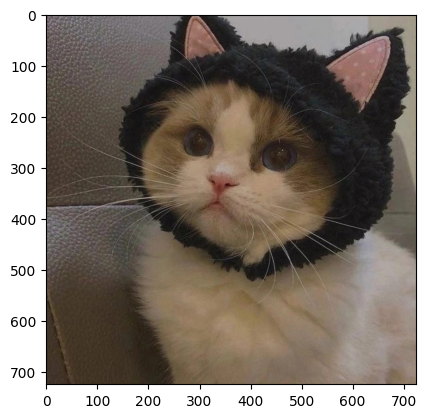

In [125]:
input_image = load_image('C:\\Users\\Stepan\\Downloads\\kitty.jpg')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)

In [129]:
KERNEL_FILTERS=(3,3,3) 
filter1 = filters(f=KERNEL_FILTERS)
filter2 = filters(f=KERNEL_FILTERS)
filter3 = filters(f=KERNEL_FILTERS)
list_filts = [filter1, filter2, filter3]

bias1 = biases()
bias2 = biases()
bias3 = biases()
biases = [bias1, bias2, bias3]


In [131]:
image_after_convolve = convolve(img=input_image, filters=list_filts, biases=biases) 

In [133]:
image_after_convolve.shape

(724, 724, 3)

In [135]:
image_after_ReLU = ReLU(img=image_after_convolve) 

In [136]:
image_after_ReLU.shape

(724, 724, 3)

In [138]:
image_after_maxpooling = max_pooling(img=image_after_ReLU, pool_size=2, stride=2)

In [139]:
image_after_maxpooling.shape

(362, 362, 3)

In [141]:
image_after_softmax = softmax(image_after_maxpooling)
image_after_softmax.shape

(362, 362, 3)

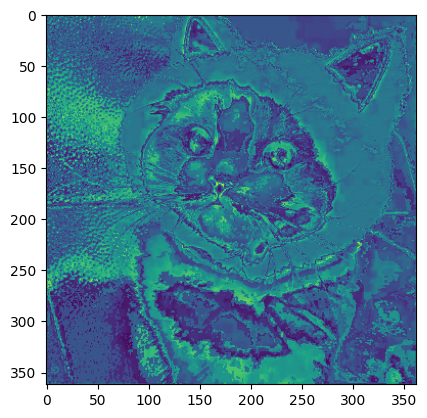

In [144]:
plt.imshow(image_after_softmax[:, :, 0])

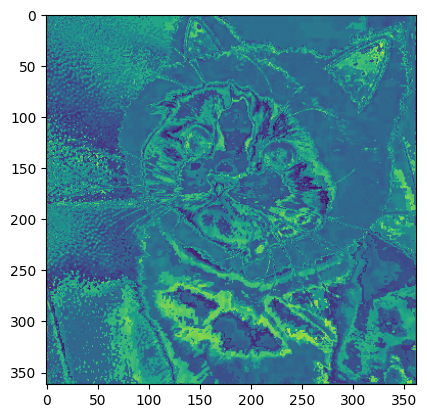

In [145]:
plt.imshow(image_after_softmax[:, :, 1])

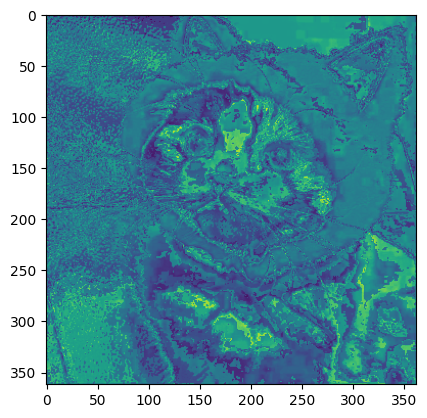

In [146]:
plt.imshow(image_after_softmax[:, :, 2])